# Ridge Regression Model for Fertility Rate Prediction

This notebook develops a Ridge (L2-regularized) linear regression model to predict global fertility
rates using socioeconomic, demographic, and public-health indicators.

## Why Ridge?
Redge applies an L2 penalty to model coefficients, shrinking weaker predictors.
This makes it especially useful for:

- Reducing model complexity
- Handling multicollinearity between predictors, but does not remove any features
- Preventing overfitting in high-dimensional data

## Model Structure:
- Input: Tabular dataset of standardized fertility-related predictors
- Algorithm: L2-regularized linear regression (Ridge)
- Optimization: Cross-validated alpha (regularization strength)
- Output: Continuous predicted fertility rate
- Result: Identifies the most influential global factors affecting fertility levels

## I) Impoorting Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

sns.set(style="whitegrid")
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

## II) Importing data

In [3]:
df_ridge = pd.read_csv('/Users/tranminu/Documents/Fertility-Rate-Prediction/data/clean/lasso_model_data.csv')

print(f"Null values for each columns:")
print(df_ridge.isna().sum())

print()
print(f"Columns in dataset:")
print(df_ridge.columns.tolist())

print()
print(f"Shape of dataset:")
print(f"Number of features: {df_ridge.shape[1]}")
print(f"Number of records: {df_ridge.shape[0]}")


Null values for each columns:
Unnamed: 0                                            0
Country Name                                          0
Country Code                                          0
Year                                                  0
Maternal mortality ratio (per 100,000 live births)    0
Fertility rate                                        0
Urban population over total population                0
Capitial GDP in USD                                   0
InfantMortality                                       0
LifeExpectancy                                        0
dtype: int64

Columns in dataset:
['Unnamed: 0', 'Country Name', 'Country Code', 'Year', 'Maternal mortality ratio (per 100,000 live births)', 'Fertility rate', 'Urban population over total population', 'Capitial GDP in USD', 'InfantMortality', 'LifeExpectancy']

Shape of dataset:
Number of features: 10
Number of records: 13856


## III) Preprocessing data

In [4]:
# unused features for predicting
drop_columns = ['Unnamed: 0', 'Country Name', 'Country Code']
try:
    print(f"Dropping columns: {drop_columns}") 
    df_ridge = df_ridge.drop(columns = drop_columns)
except:
    print(f"Columns already removed")

print()
print(f"Remains columns:")
print(df_ridge.columns.tolist())

Dropping columns: ['Unnamed: 0', 'Country Name', 'Country Code']

Remains columns:
['Year', 'Maternal mortality ratio (per 100,000 live births)', 'Fertility rate', 'Urban population over total population', 'Capitial GDP in USD', 'InfantMortality', 'LifeExpectancy']


## IV) Data spliting 

Spliting dataset by year for time series analysing 

In [5]:
Features_columns = ['Year', 'Maternal mortality ratio (per 100,000 live births)', 'Urban population over total population', 'Capitial GDP in USD', 'InfantMortality', 'LifeExpectancy']

print(f"Feautres columns: {Features_columns}")
print(f"Target columns: {'Fertility rate'}")

# spliting data by ratio 8:2 for train, test
train_end_year = 2011

# Create splits based on year
train_mask = df_ridge['Year'] <= train_end_year
test_mask = df_ridge['Year'] > train_end_year

# Split the data by year
train_df = df_ridge[train_mask].copy()
test_df = df_ridge[test_mask].copy()

X_train = train_df[Features_columns]
X_test = test_df[Features_columns]
y_train = train_df['Fertility rate']
y_test = test_df['Fertility rate']

print()
print("Time-Aware Split Summary:")
print("="*80)
print(f"Train set: {len(train_df):,} samples ({len(train_df)/len(df_ridge)*100:.1f}%) - Years {train_df['Year'].min():.0f} to {train_df['Year'].max():.0f}")
print(f"Test set:  {len(test_df):,} samples ({len(test_df)/len(df_ridge)*100:.1f}%) - Years {test_df['Year'].min():.0f} to {test_df['Year'].max():.0f}")

Feautres columns: ['Year', 'Maternal mortality ratio (per 100,000 live births)', 'Urban population over total population', 'Capitial GDP in USD', 'InfantMortality', 'LifeExpectancy']
Target columns: Fertility rate

Time-Aware Split Summary:
Train set: 11,252 samples (81.2%) - Years 1960 to 2011
Test set:  2,604 samples (18.8%) - Years 2012 to 2023


## V) Redge Pipeline 

In [6]:
# pipeline for ridge reression 
Ridge_pipeline = Pipeline(
    steps=[
        ('scaler', StandardScaler()), # data scalling 
         ('ridge', Ridge(random_state=RANDOM_STATE))
    ]
)
# randomly alpha list for validiation 
alpha_values = np.logspace(0, 10, 100)

print(f"Lists of alpha")
print(alpha_values)

Lists of alpha
[1.00000000e+00 1.26185688e+00 1.59228279e+00 2.00923300e+00
 2.53536449e+00 3.19926714e+00 4.03701726e+00 5.09413801e+00
 6.42807312e+00 8.11130831e+00 1.02353102e+01 1.29154967e+01
 1.62975083e+01 2.05651231e+01 2.59502421e+01 3.27454916e+01
 4.13201240e+01 5.21400829e+01 6.57933225e+01 8.30217568e+01
 1.04761575e+02 1.32194115e+02 1.66810054e+02 2.10490414e+02
 2.65608778e+02 3.35160265e+02 4.22924287e+02 5.33669923e+02
 6.73415066e+02 8.49753436e+02 1.07226722e+03 1.35304777e+03
 1.70735265e+03 2.15443469e+03 2.71858824e+03 3.43046929e+03
 4.32876128e+03 5.46227722e+03 6.89261210e+03 8.69749003e+03
 1.09749877e+04 1.38488637e+04 1.74752840e+04 2.20513074e+04
 2.78255940e+04 3.51119173e+04 4.43062146e+04 5.59081018e+04
 7.05480231e+04 8.90215085e+04 1.12332403e+05 1.41747416e+05
 1.78864953e+05 2.25701972e+05 2.84803587e+05 3.59381366e+05
 4.53487851e+05 5.72236766e+05 7.22080902e+05 9.11162756e+05
 1.14975700e+06 1.45082878e+06 1.83073828e+06 2.31012970e+06
 2.915053

## VI) Hyperparamter tuning 

In [7]:
# Parameter grid 
param_grid = {"ridge__alpha": alpha_values}

# Fitting the model with 5 fold 
ridge_cv = GridSearchCV(estimator=Ridge_pipeline, 
                        param_grid=param_grid, 
                        scoring='neg_mean_squared_error', 
                        cv=5,
                        n_jobs=-1,
                        verbose=1)

print(f"Fiitng ridge regrssion")
ridge_cv.fit(X_train, y_train)
best_ridge = ridge_cv.best_estimator_

# Evaluate on test set


print(f"\nBest alpha: {ridge_cv.best_params_['ridge__alpha']}")
print(f"Best CV score (neg MSE): {ridge_cv.best_score_}")


Fiitng ridge regrssion
Fitting 5 folds for each of 100 candidates, totalling 500 fits



Best alpha: 533.6699231206308
Best CV score (neg MSE): -1.4104338840380428


## VII) Model Evaluation

In [8]:
best_ridge_model = ridge_cv.best_estimator_

# evaluate based on MSE, MAE, R2
def evaluate(y_pred,y_true, data_type):
    # calculating MSE, MAE, R2
    MSE = mean_squared_error(y_true= y_true, y_pred= y_pred)
    MAE = mean_absolute_error(y_true= y_true, y_pred= y_pred)
    R2 = r2_score(y_true = y_true, y_pred = y_pred)

    print(f"Validiation for {data_type} set")
    print(f"MSE: {MSE}")
    print(f"MAE: {MAE}")
    print(f"R2: {R2}")

# finding the predition for each set
y_train_pred = best_ridge_model.predict(X_train)
y_test_pred = best_ridge_model.predict(X_test)

# conducting evaluating
evaluate(y_train_pred,y_train,"training")
print()
evaluate(y_test_pred, y_test, "test")


Validiation for training set
MSE: 1.35251008570095
MAE: 0.9231409457332153
R2: 0.6673267825918381

Validiation for test set
MSE: 0.8487532056678384
MAE: 0.6727717316735593
R2: 0.5124489371686571


## VIII) Analysing through alpha

In order to see the performances of the model, we conduct visulizations for Coeffecient for each features and MSE redudent in term of alpha. Note that the higher alpha, the higher in the apllied penalty

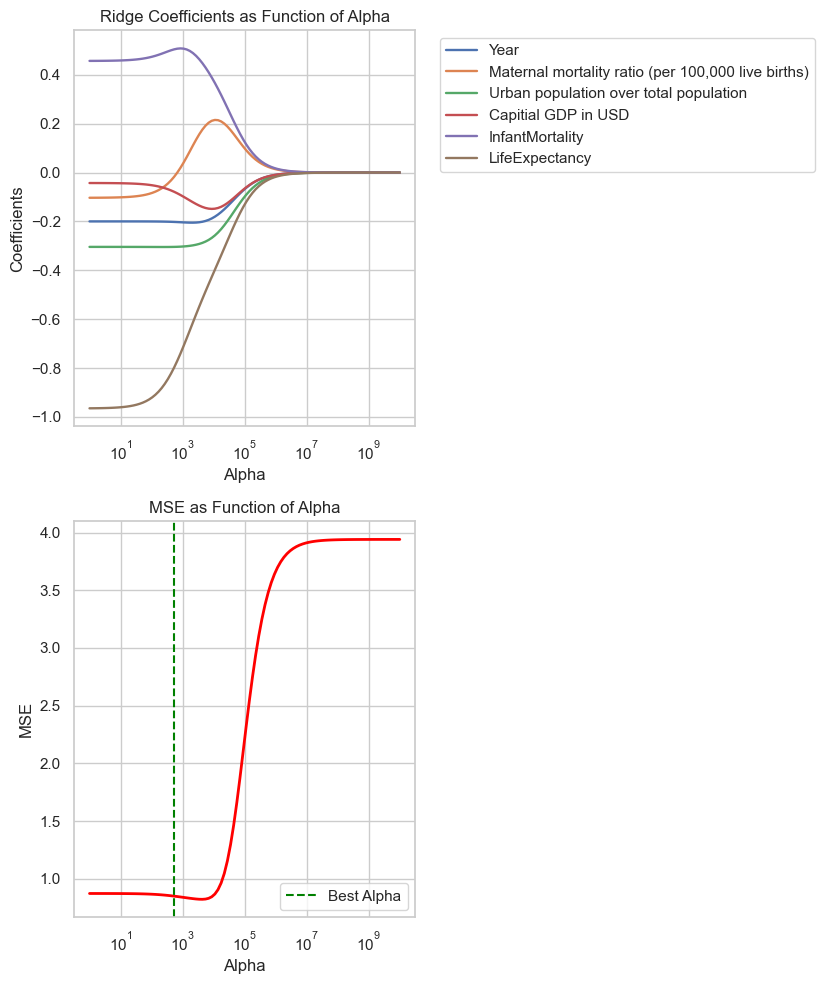

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use transform, not fit_transform!

coef_array = []
mse_values = []

for a in alpha_values:
    model = Ridge(alpha=a, random_state=RANDOM_STATE)
    model.fit(X_train_scaled, y_train)
    coef_array.append(model.coef_)
    mse_values.append(mean_squared_error(y_true=y_test, y_pred=model.predict(X_test_scaled)))

# Convert list to numpy array for easier indexing
coef_array = np.array(coef_array)

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
for i, f in enumerate(X_train.columns):
    plt.plot(alpha_values, coef_array[:, i], label=f, linewidth=1.7)
plt.xscale('log')
plt.xlabel("Alpha")
plt.ylabel("Coefficients")
plt.title('Ridge Coefficients as Function of Alpha')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.tight_layout()

# MSE plot
plt.subplot(2, 2, 3)
plt.plot(alpha_values, mse_values, linewidth=2, color='red')
plt.xscale('log')
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.title('MSE as Function of Alpha')
plt.axvline(x=ridge_cv.best_params_['ridge__alpha'], 
            color='green', linestyle='--', label='Best Alpha')
plt.legend()

plt.tight_layout()
plt.show()

## IX) Prediction and Residual error 

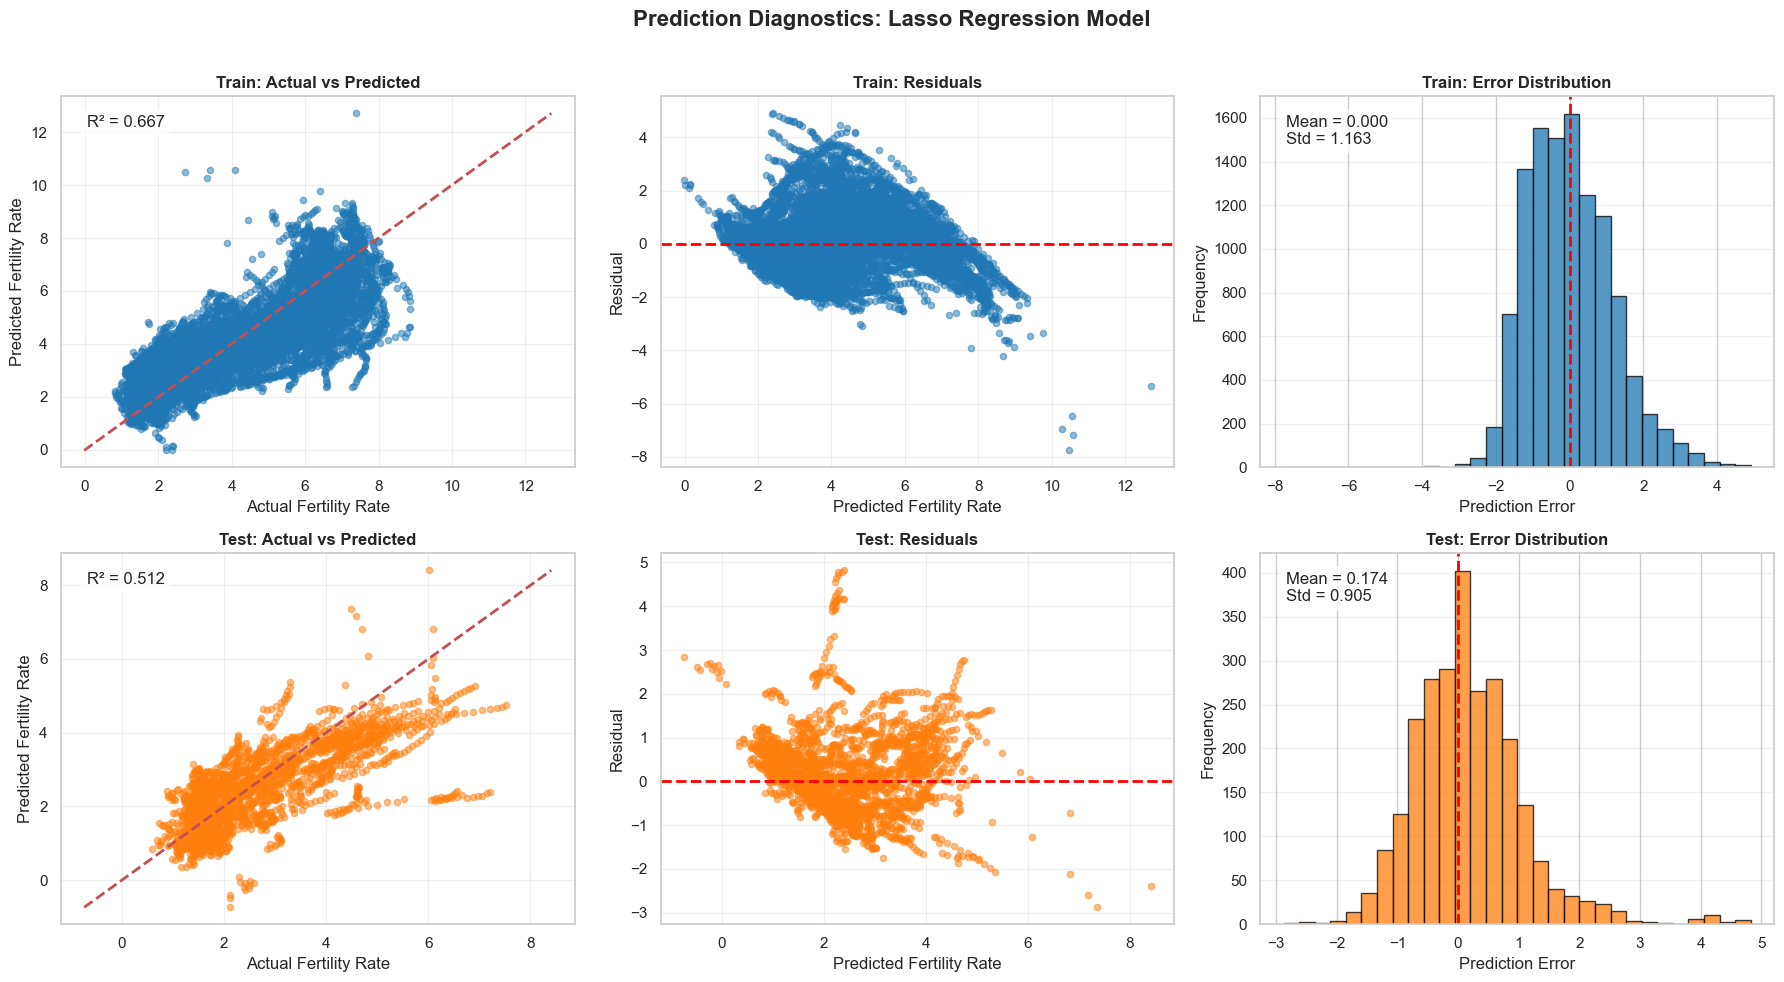

In [10]:
# Dataset grouping for looping
prediction_sets = [
    ("Train", y_train, y_train_pred, "tab:blue"),
    ("Test",  y_test,  y_test_pred,  "tab:orange"),
]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for row, (name, y_true, y_pred, color) in enumerate(prediction_sets):

    residuals = y_true - y_pred

    # Actual vs Predicted Scatter
    ax1 = axes[row, 0]
    ax1.scatter(y_true, y_pred, alpha=0.5, s=20, color=color)

    # 45-degree reference line
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    ax1.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)

    ax1.set_title(f"{name}: Actual vs Predicted", fontweight="bold")
    ax1.set_xlabel("Actual Fertility Rate")
    ax1.set_ylabel("Predicted Fertility Rate")
    ax1.grid(alpha=0.3)

    # R² annotation
    r2 = r2_score(y_true, y_pred)
    ax1.text(
        0.05, 0.95, f"R² = {r2:.3f}",
        transform=ax1.transAxes,
        va="top",
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.8)
    )

    # Residuals vs Predicted Scatter
    ax2 = axes[row, 1]
    ax2.scatter(y_pred, residuals, alpha=0.5, s=20, color=color)
    ax2.axhline(0, color="red", linestyle="--", linewidth=2)

    ax2.set_title(f"{name}: Residuals", fontweight="bold")
    ax2.set_xlabel("Predicted Fertility Rate")
    ax2.set_ylabel("Residual")
    ax2.grid(alpha=0.3)

    # Error Distribution Histogram
    ax3 = axes[row, 2]
    ax3.hist(residuals, bins=30, color=color, alpha=0.75, edgecolor="black")
    ax3.axvline(0, color="red", linestyle="--", linewidth=2)

    ax3.set_title(f"{name}: Error Distribution", fontweight="bold")
    ax3.set_xlabel("Prediction Error")
    ax3.set_ylabel("Frequency")
    ax3.grid(axis="y", alpha=0.3)

    # Mean & Std annotation
    ax3.text(
        0.05, 0.95,
        f"Mean = {residuals.mean():.3f}\nStd = {residuals.std():.3f}",
        transform=ax3.transAxes,
        va="top",
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.8)
    )

plt.suptitle("Prediction Diagnostics: Lasso Regression Model", fontsize=16, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


## X) Summary

In [11]:
# Helper functions for metrics
def mse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

def mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

def r2(y_true, y_pred):
    return r2_score(y_true, y_pred)

# Training metrics
train_mse = mse(y_train, y_train_pred)
train_mae  = mae(y_train, y_train_pred)
train_r2   = r2(y_train, y_train_pred)

# Test metrics
test_mse = mse(y_test, y_test_pred)
test_mae  = mae(y_test, y_test_pred)
test_r2   = r2(y_test, y_test_pred)

# Summary Statements
print("="*80)
print("LASSO REGRESSION MODEL: FINAL SUMMARY")
print("="*80)

print("\nModel Configuration:")
print(f"  - Input features: {X_train.shape[1]}")
print(f"  - Regularization type: L2 (Ridge)")
print(f"  - Best alpha (λ) selected via CV: {ridge_cv.best_params_['ridge__alpha']:.5f}")
print(f"  - Feature scaling: StandardScaler()")
print(f"  - Cross-validation folds: {5}")

print("\nTraining & Optimization:")
print("  - Hyperparameter search space: logspace(0, 10, 100)")
print(f"  - Best CV score (neg. MSE): {ridge_cv.best_score_:.5f}")
print("  - Objective: Minimize prediction error and enforce sparsity in coefficients")

print("\nFinal Performance:")

print("\n  Training Set:")
print(f"    MSE: {train_mse:.4f}")
print(f"    MAE:  {train_mae:.4f}")
print(f"    R²:   {train_r2:.4f}")

print("\n  Test Set:")
print(f"    MSE: {test_mse:.4f}")
print(f"    MAE:  {test_mae:.4f}")
print(f"    R²:   {test_r2:.4f}")

print("\nModel Interpretability:")
print(f"  - Total features considered: {len(X_train.columns)}")


LASSO REGRESSION MODEL: FINAL SUMMARY

Model Configuration:
  - Input features: 6
  - Regularization type: L2 (Ridge)
  - Best alpha (λ) selected via CV: 533.66992
  - Feature scaling: StandardScaler()
  - Cross-validation folds: 5

Training & Optimization:
  - Hyperparameter search space: logspace(0, 10, 100)
  - Best CV score (neg. MSE): -1.41043
  - Objective: Minimize prediction error and enforce sparsity in coefficients

Final Performance:

  Training Set:
    MSE: 1.3525
    MAE:  0.9231
    R²:   0.6673

  Test Set:
    MSE: 0.8488
    MAE:  0.6728
    R²:   0.5124

Model Interpretability:
  - Total features considered: 6


## XI) Saving result

In [ ]:
import os, json
# create a database for the model coefficient

ridge_step = best_ridge_model.named_steps["ridge"]

coefficients = ridge_step.coef_

ridge_df = pd.DataFrame(
    {
        "Feature": X_train.columns,
        "Coefficient": coefficients
    }
).sort_values(by="Coefficient", key=lambda s: s.abs(), ascending=False)

print("\nridge coefficients (sorted by absolute magnitude):")
display(ridge_df)

# Directory
models_dir = ".../models"

# Compute metrics
lasso_metrics = {
    "train": {
        "mse": train_mse,
        "mae":  train_mae,
        "r2":  train_r2
    },
    "test": {
        "mse": test_mse,
        "mae":  test_mae,
        "r2":   test_r2
    },
    "model_config": {
        "regularization": "L2 (Ridge)",
        "best_alpha": float(ridge_cv.best_params_['ridge__alpha']),
        "num_input_features": int(X_train.shape[1]),

    }
}

# Save metrics JSON
with open(os.path.join(models_dir, "ridge_metrics.json"), "w") as f:
    json.dump(lasso_metrics, f, indent=2)

# Save coefficient table
ridge_df.to_csv(os.path.join(models_dir, "ridge_coefficients.csv"), index=False)

print("\nridge model outputs saved:")
print(f"  - {models_dir}/ridge_metrics.json")


ridge coefficients (sorted by absolute magnitude):


,Feature,Coefficient
5,LifeExpectancy,-0.797717
4,InfantMortality,0.504201
2,Urban population over total population,-0.304178
0,Year,-0.202036
3,Capitial GDP in USD,-0.078694
1,"Maternal mortality ratio (per 100,000 live bir...",-0.017258



ridge model outputs saved:
  - /Users/tranminu/Documents/Fertility-Rate-Prediction/models/ridge_metrics.json
